<a href="https://colab.research.google.com/github/joanizba/Spotifypred/blob/main/EDA_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PROYECTO_FINAL/dataset/playlist_2010to2022.csv')
print(df.head())


                                        playlist_url  year  \
0  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
1  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
2  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
3  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   
4  https://open.spotify.com/playlist/37i9dQZF1DWU...  2000   

                 track_id            track_name  track_popularity  \
0  3AJwUDP919kvQ9QcozQPxg                Yellow                91   
1  2m1hi0nfMR9vdGC8UcrnwU  All The Small Things                84   
2  3y4LxiYMgDl4RethdzpmNe               Breathe                69   
3  60a0Rd6pjrkxjPbaKzXjfq            In the End                88   
4  62bOmKYxYg7dhrC6gH9vFn           Bye Bye Bye                74   

                           album               artist_id  artist_name  \
0                     Parachutes  4gzpq5DPGxSnKTe4SA8HAU     Coldplay   
1             Enema Of The State  6FBDaR13swtiWwGhX1WQsP    blink-

In [ ]:
df.describe ()

,year,track_popularity,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,2300.000000,2300.000000,2300.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,2011.000000,70.943478,72.869565,0.660116,0.693047,5.277947,-5.784040,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128,3.982166
std,6.634692,12.291526,12.179263,0.141137,0.164838,3.628494,2.080853,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588,0.219054
min,2000.000000,0.000000,29.000000,0.162000,0.051900,0.000000,-21.107000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000,1.000000
25%,2005.000000,66.000000,65.000000,0.572000,0.586000,2.000000,-6.823500,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000,4.000000
50%,2011.000000,72.000000,74.000000,0.671000,0.712000,5.000000,-5.511000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000,4.000000
75%,2017.000000,79.000000,82.000000,0.759500,0.820000,8.000000,-4.364500,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000,4.000000
max,2022.000000,100.000000,100.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.978000,0.985000,0.843000,0.974000,210.857000,688453.000000,5.000000


In [ ]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
plt.figure(figsize=(10, 8))
fig1 = px.imshow(df.isnull(),
color_continuous_scale=['black', 'red'],
labels=dict(color="NaN"),
title="")
fig1.update_layout(width=700, height=700)
fig1.update_coloraxes(showscale=False)
fig1.show()


<Figure size 1000x800 with 0 Axes>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   playlist_url       2300 non-null   object 
 1   year               2300 non-null   int64  
 2   track_id           2300 non-null   object 
 3   track_name         2300 non-null   object 
 4   track_popularity   2300 non-null   int64  
 5   album              2300 non-null   object 
 6   artist_id          2300 non-null   object 
 7   artist_name        2300 non-null   object 
 8   artist_genres      2300 non-null   object 
 9   artist_popularity  2300 non-null   int64  
 10  danceability       2299 non-null   float64
 11  energy             2299 non-null   float64
 12  key                2299 non-null   float64
 13  loudness           2299 non-null   float64
 14  mode               2299 non-null   float64
 15  speechiness        2299 non-null   float64
 16  acousticness       2299 

In [ ]:
columnas_df=df.columns.tolist()

for i in df:
  print("===========================")
  print(f"{df[i].value_counts()}")

playlist_url
https://open.spotify.com/playlist/37i9dQZF1DWUZv12GM5cFk    100
https://open.spotify.com/playlist/37i9dQZF1DX9Ol4tZWPH6V    100
https://open.spotify.com/playlist/37i9dQZF1DX0P7PzzKwEKl    100
https://open.spotify.com/playlist/37i9dQZF1DXaW8fzPh9b08    100
https://open.spotify.com/playlist/37i9dQZF1DWTWdbR13PQYH    100
https://open.spotify.com/playlist/37i9dQZF1DWWzQTBs5BHX9    100
https://open.spotify.com/playlist/37i9dQZF1DX1vSJnMeoy3V    100
https://open.spotify.com/playlist/37i9dQZF1DX3j9EYdzv2N9    100
https://open.spotify.com/playlist/37i9dQZF1DWYuGZUE4XQXm    100
https://open.spotify.com/playlist/37i9dQZF1DX4UkKv8ED8jp    100
https://open.spotify.com/playlist/37i9dQZF1DXc6IFF23C9jj    100
https://open.spotify.com/playlist/37i9dQZF1DXcagnSNtrGuJ    100
https://open.spotify.com/playlist/37i9dQZF1DX0yEZaMOXna3    100
https://open.spotify.com/playlist/37i9dQZF1DX3Sp0P28SIer    100
https://open.spotify.com/playlist/37i9dQZF1DX0h0QnLkMBl4    100
https://open.spotify.com/pl

In [ ]:
# Understand the Data's Shape
print("Shape of the DataFrame:", df.shape)

# Examine Data Types
print("\nData Types of Columns:\n", df.dtypes)

# Check for Missing Values
print("\nMissing Values per Column:\n", df.isnull().sum())

# Analyze the Timeframe
print("\nRange of Release Years:", df['year'].min(), "-", df['year'].max())

# Initial Summary of Features
print("\nUnique Genres:", df['artist_genres'].nunique())
print("\nNumber of Unique Artists:", df['artist_name'].nunique())
print("\nPopularity Distribution (Mean):", df['track_popularity'].mean())

Shape of the DataFrame: (2300, 23)

Data Types of Columns:
 playlist_url          object
year                   int64
track_id              object
track_name            object
track_popularity       int64
album                 object
artist_id             object
artist_name           object
artist_genres         object
artist_popularity      int64
danceability         float64
energy               float64
key                  float64
loudness             float64
mode                 float64
speechiness          float64
acousticness         float64
instrumentalness     float64
liveness             float64
valence              float64
tempo                float64
duration_ms          float64
time_signature       float64
dtype: object

Missing Values per Column:
 playlist_url         0
year                 0
track_id             0
track_name           0
track_popularity     0
album                0
artist_id            0
artist_name          0
artist_genres        0
artist_popularity    0


In [ ]:
# Extract Year and Month
df['release_year'] = df['year']
df['release_month'] = 1  # Assume January if month is not available

# Calculate Song Duration in Minutes
df['duration_minutes'] = df['duration_ms'] / 60000

# Artist Popularity Feature
artist_song_counts = df.groupby('artist_name')['track_name'].count()
df['artist_popularity'] = df['artist_name'].map(artist_song_counts)

# Genre Popularity
genre_song_counts = df.explode('artist_genres').groupby('artist_genres')['track_name'].count()
df['genre_popularity'] = df['artist_genres'].apply(lambda x: genre_song_counts.get(x[0], 0) if isinstance(x, list) and len(x) > 0 else 0)

display(df.head())

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,release_year,release_month,duration_minutes,genre_popularity
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",18,...,0.000121,0.2340,0.285,173.372,266773.0,4.0,2000,1,4.446217,0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",2,...,0.000000,0.6120,0.684,148.726,167067.0,4.0,2000,1,2.784450,0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",2,...,0.000000,0.2510,0.278,136.859,250547.0,4.0,2000,1,4.175783,0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",10,...,0.000000,0.2090,0.400,105.143,216880.0,4.0,2000,1,3.614667,0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",6,...,0.001200,0.0821,0.861,172.638,200400.0,4.0,2000,1,3.340000,0


,release_year,artist_popularity
0,2000,4.04
1,2001,3.76
2,2002,5.64
3,2003,4.81
4,2004,5.34
5,2005,6.01
6,2006,5.74
7,2007,6.16
8,2008,7.15
9,2009,8.06


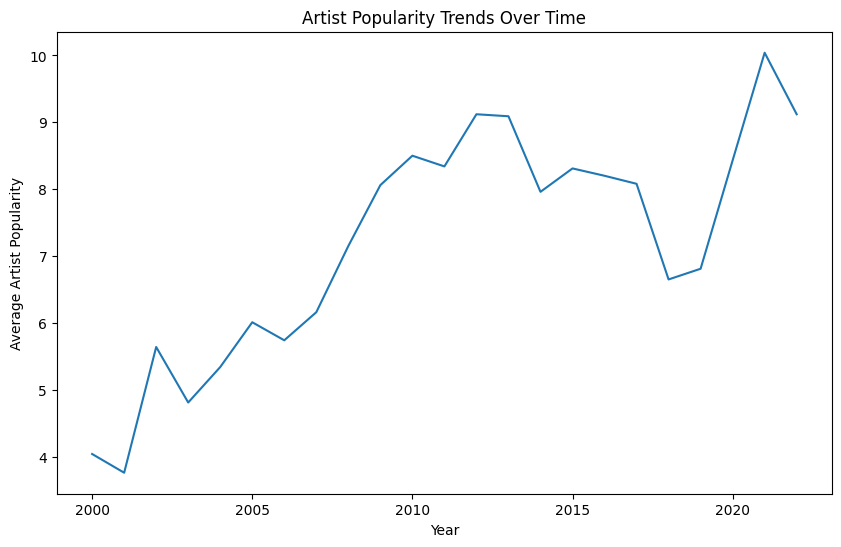

In [ ]:
# Group by year and calculate the average artist popularity for each year
artist_popularity_trends = df.groupby('release_year')['artist_popularity'].mean().reset_index()

# Display the artist popularity trends over the years
display(artist_popularity_trends)

# Plot the artist popularity trends over time
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(artist_popularity_trends['release_year'], artist_popularity_trends['artist_popularity'])
plt.xlabel('Year')
plt.ylabel('Average Artist Popularity')
plt.title('Artist Popularity Trends Over Time')
plt.show()

,release_year,duration_minutes
0,2000,4.146817
1,2001,4.040445
2,2002,4.130478
3,2003,4.064223
4,2004,3.880900
5,2005,3.938118
6,2006,3.833015
7,2007,3.988479
8,2008,3.847741
9,2009,3.902061


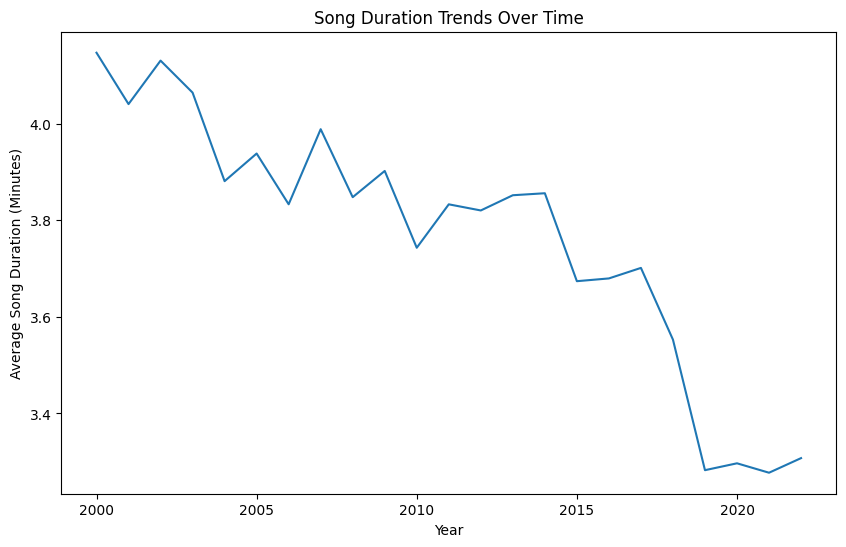

In [ ]:
# Group by year and calculate the mean song duration for each year
duration_trends = df.groupby('release_year')['duration_minutes'].mean().reset_index()

# Display the song duration trends over the years
display(duration_trends)

# Plot the song duration trends over time
plt.figure(figsize=(10, 6))
plt.plot(duration_trends['release_year'], duration_trends['duration_minutes'])
plt.xlabel('Year')
plt.ylabel('Average Song Duration (Minutes)')
plt.title('Song Duration Trends Over Time')
plt.show()

In [ ]:
# Identify Potential Outliers using a Box Plot
numerical_features = ['track_popularity', 'artist_popularity', 'danceability', 'energy', 'tempo']


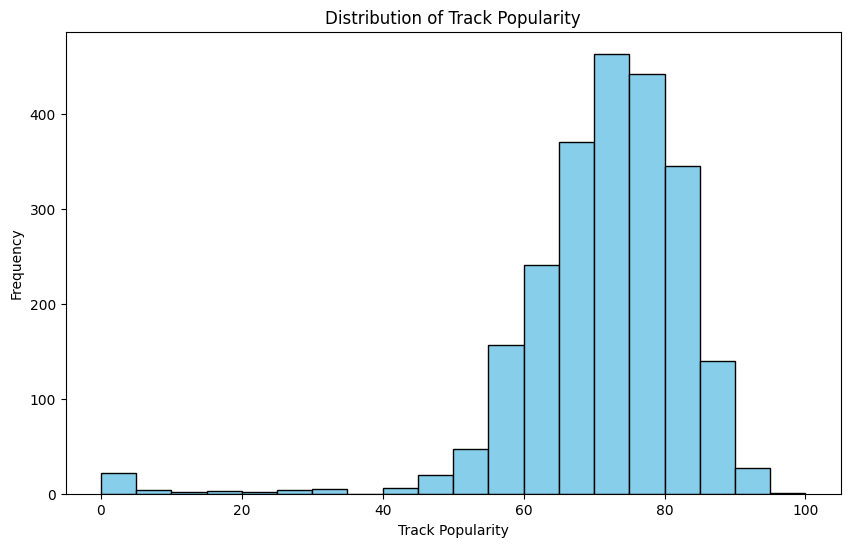

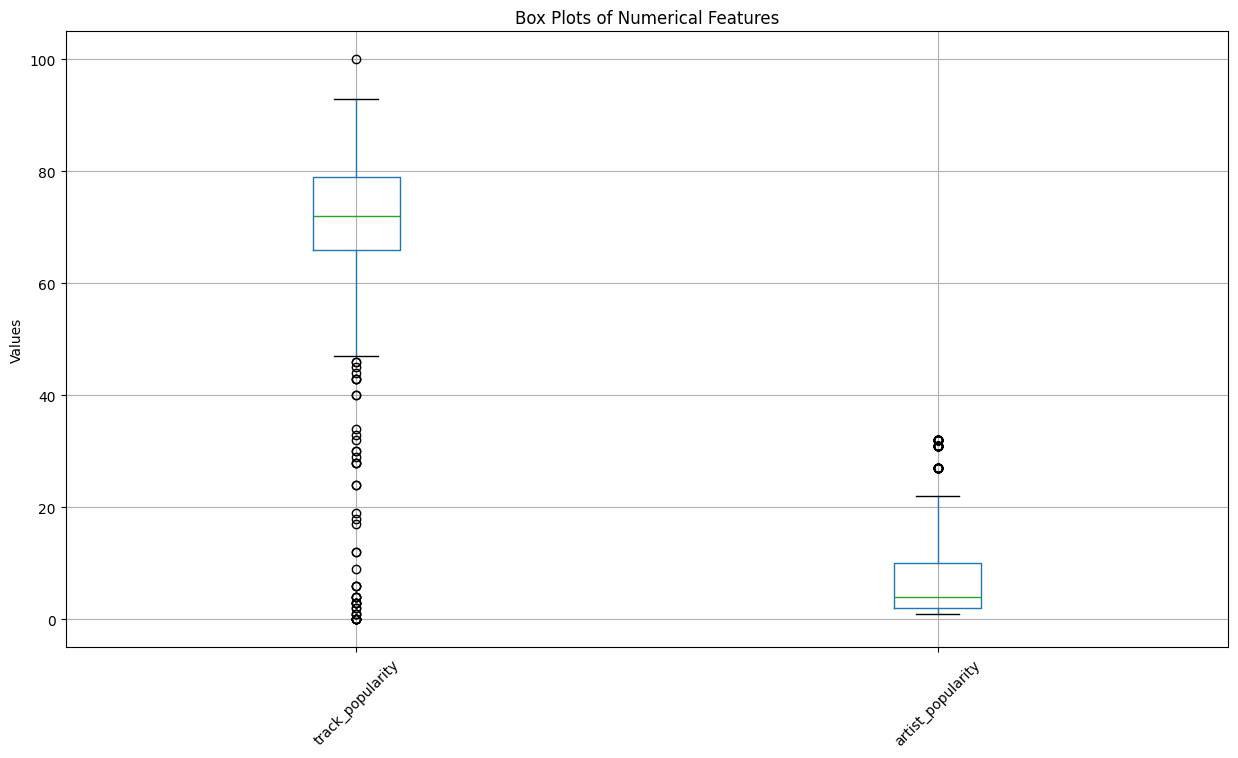

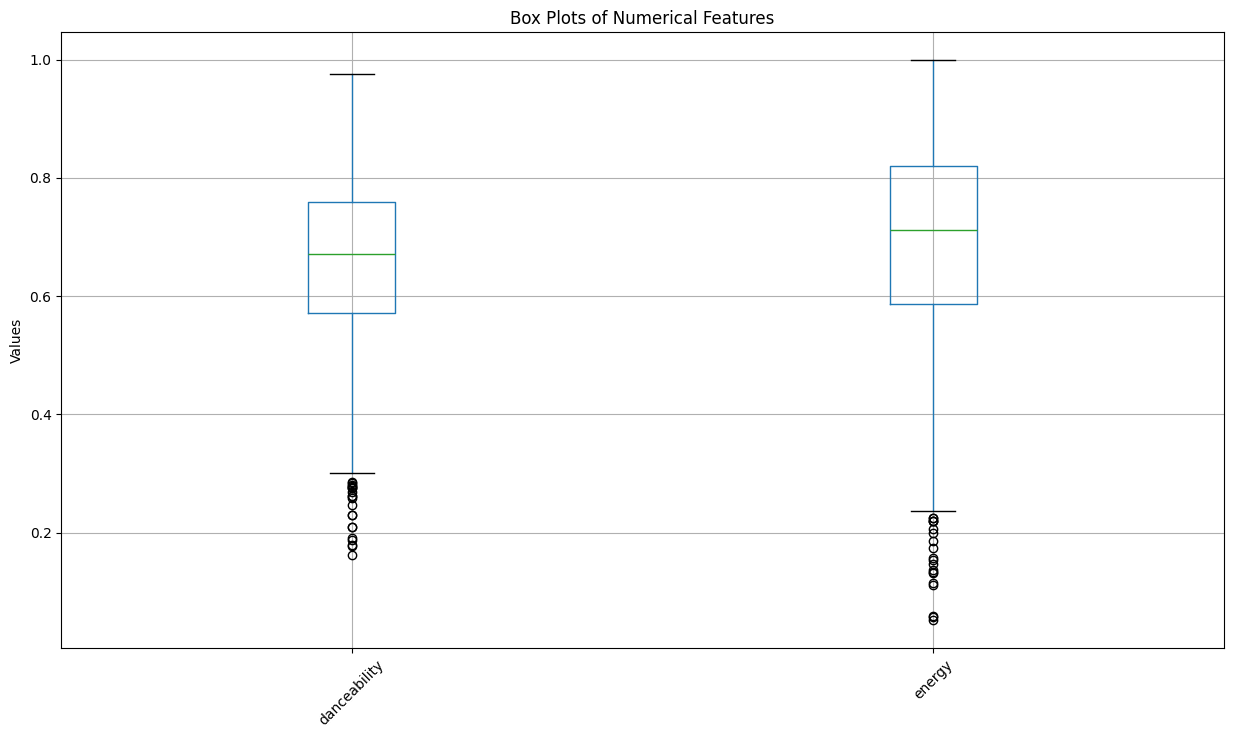

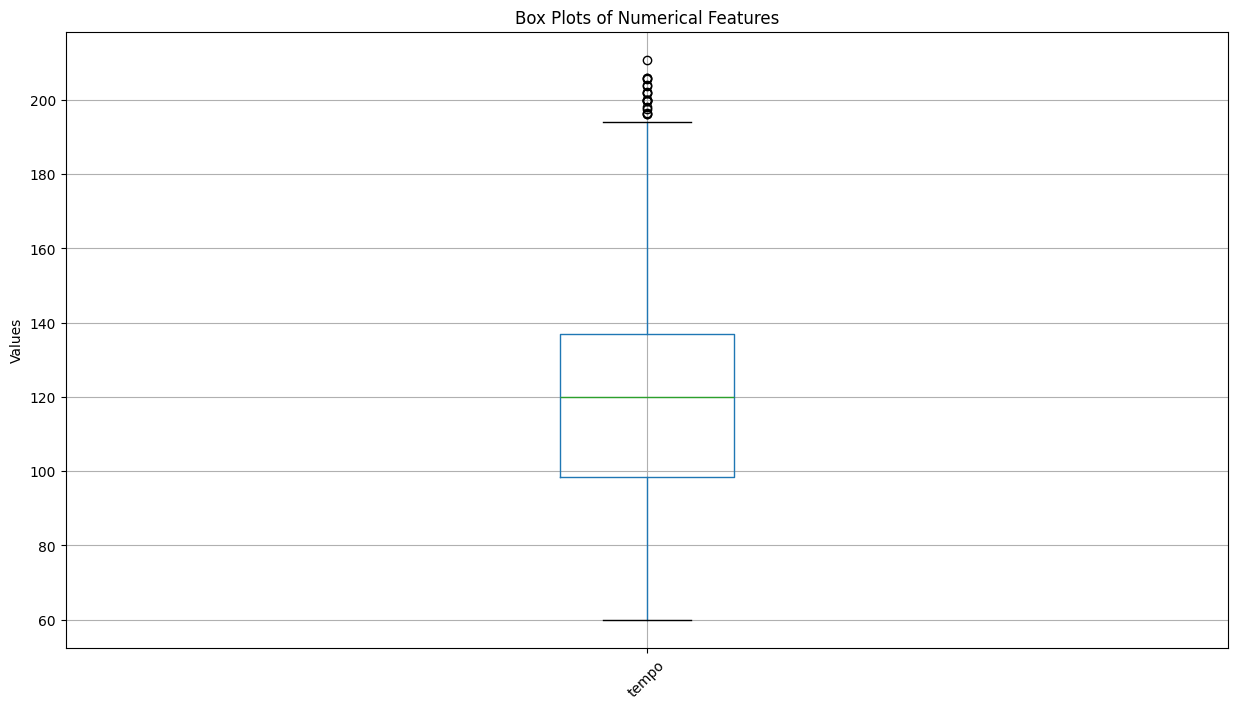

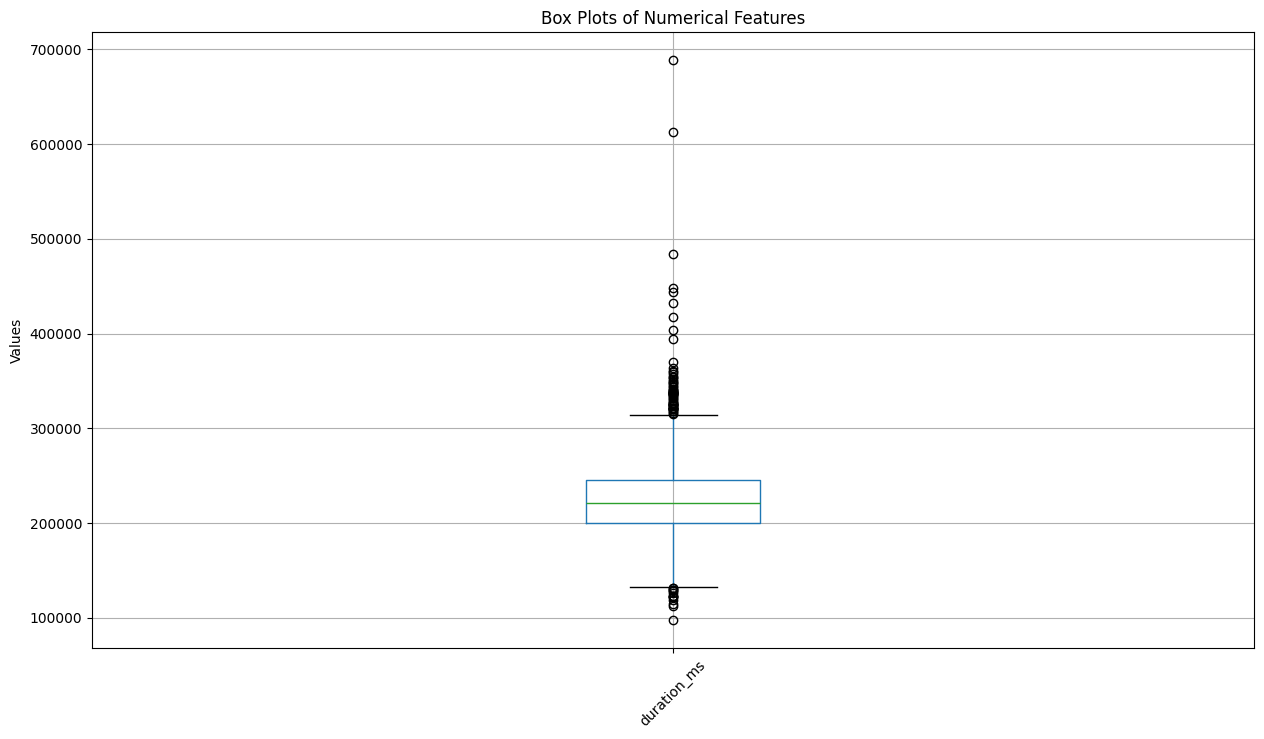

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualize the distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

track_artist  = ['track_popularity', 'artist_popularity']
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

# Generar el boxplot
df[track_artist].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
ax.set_xticklabels(track_artist, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

danc_ene  = ['danceability', 'energy']
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

# Generar el boxplot
df[danc_ene].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
ax.set_xticklabels(danc_ene, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

tempo = ['tempo']
# Generar el boxplot
df[tempo].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
ax.set_xticklabels(tempo, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

fig, ax = plt.subplots(figsize=(15, 8))  # Se define la figura aquí

duration = ['duration_ms']
# Generar el boxplot
df[duration].boxplot(ax=ax)  # Se asigna el eje "ax"

# Configuraciones adicionales
ax.set_title('Box Plots of Numerical Features')
ax.set_ylabel('Values')
# The error was in this line. Instead of using df[duration], you should use duration which is the list of labels.
ax.set_xticklabels(duration, rotation=45)  # Se usa ax.set_xticklabels en lugar de plt.xticks
  # Se aplica la escala logarítmica correctamente

plt.show()

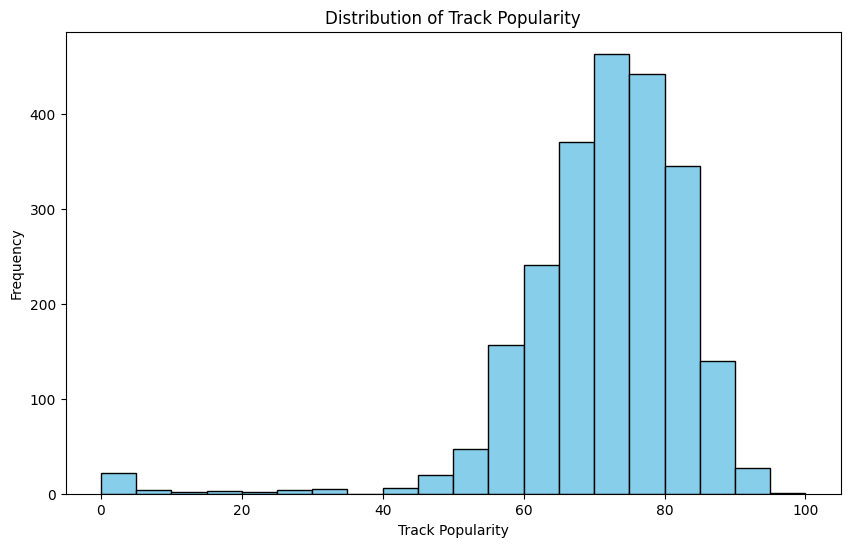

<ipython-input-30-1dff54230fc0>:23: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



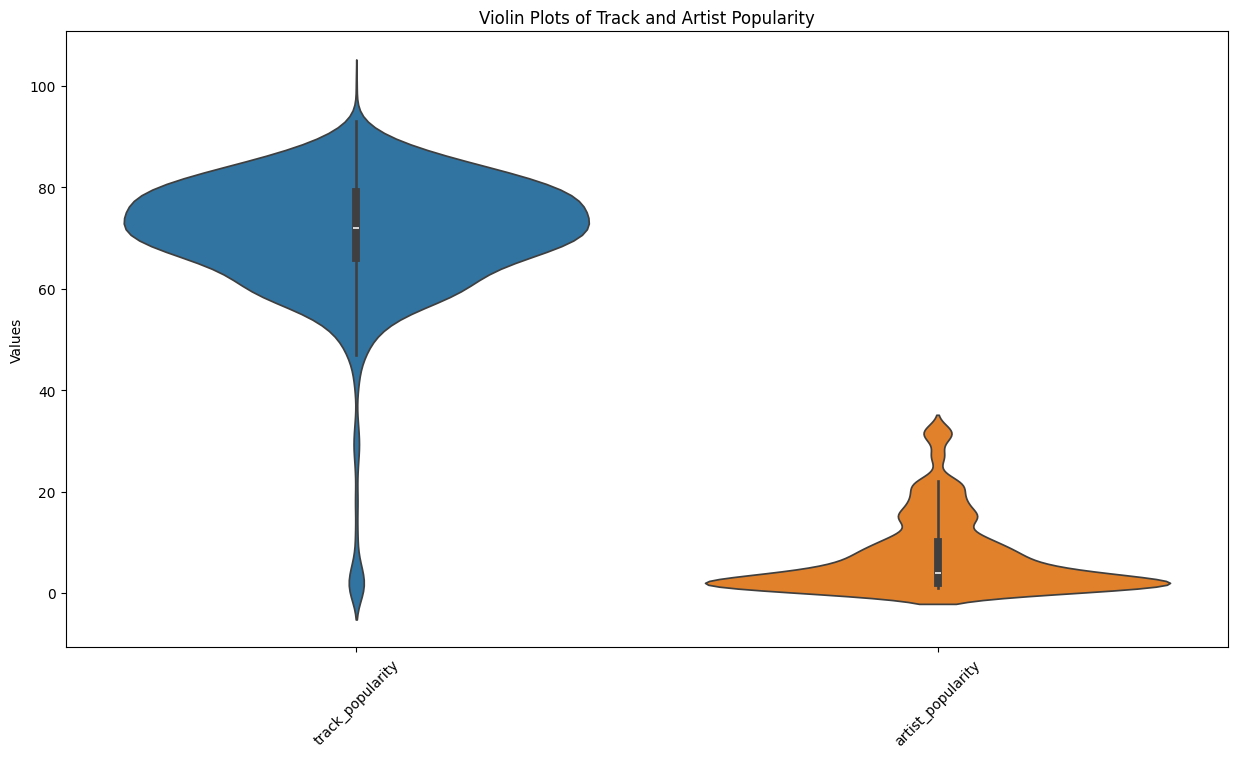

<ipython-input-30-1dff54230fc0>:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



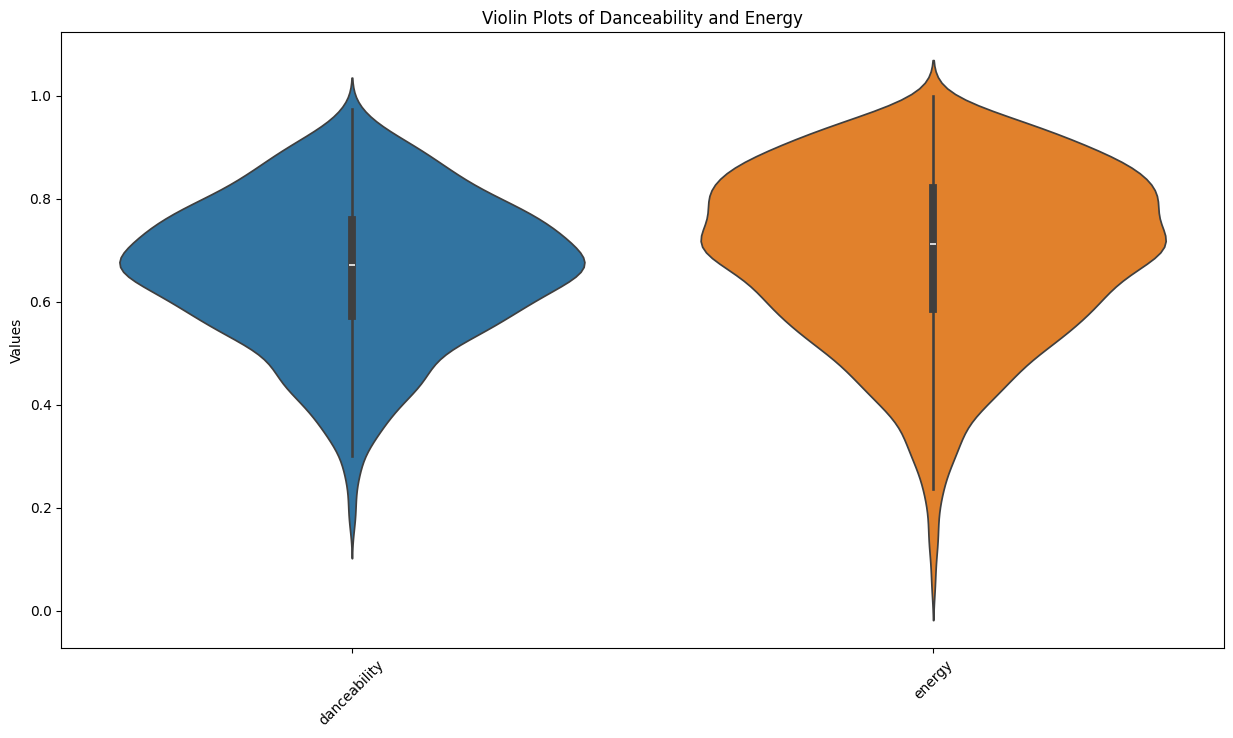

<ipython-input-30-1dff54230fc0>:37: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



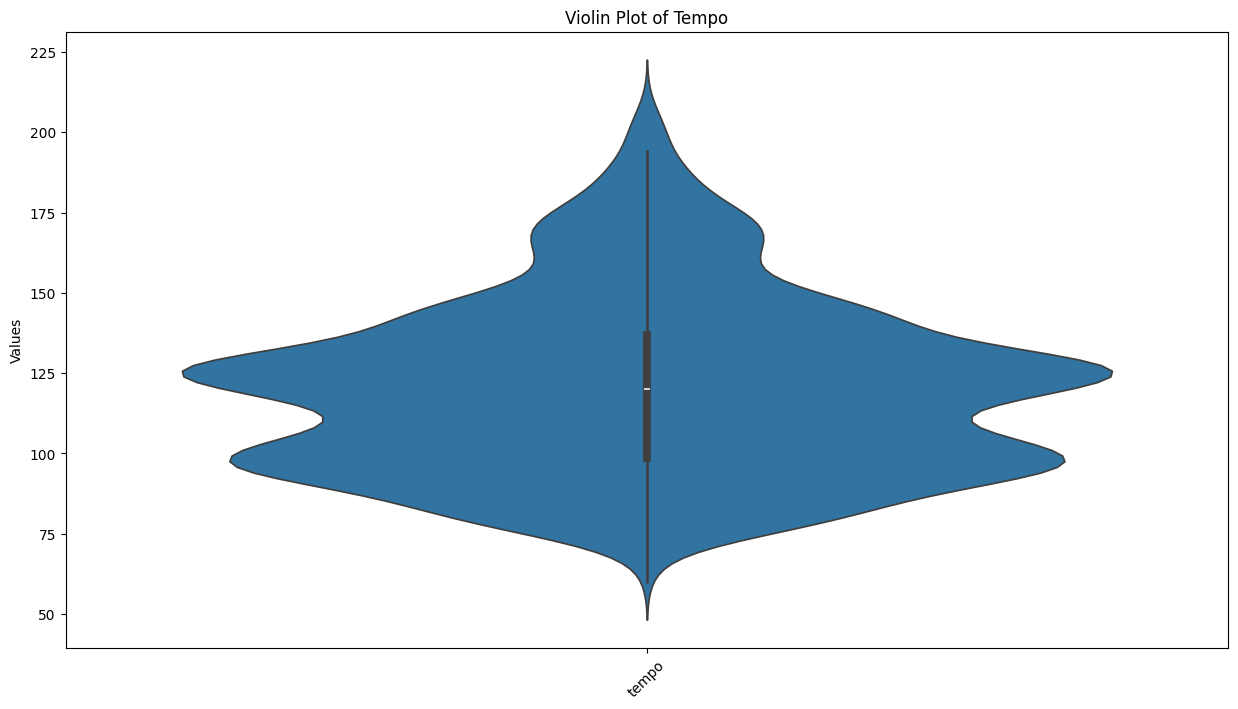

<ipython-input-30-1dff54230fc0>:44: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



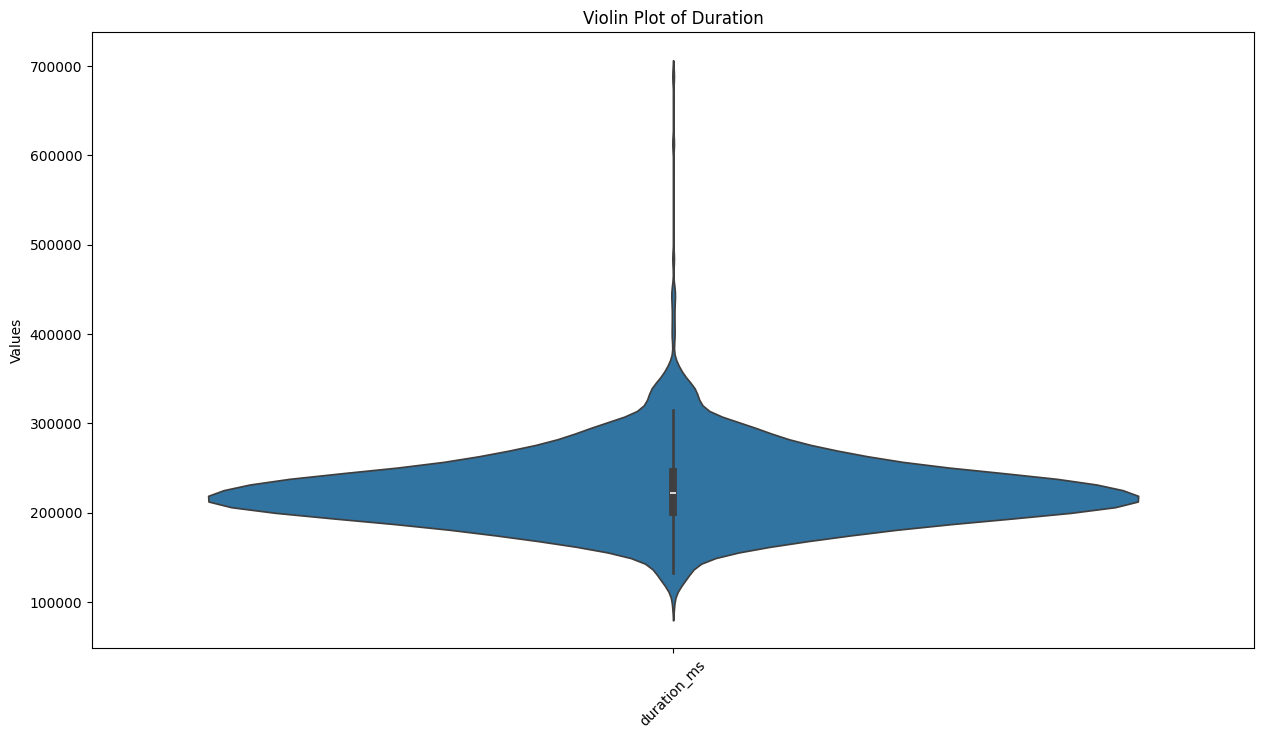

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of popularity using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['track_popularity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

# Define feature groups
track_artist  = ['track_popularity', 'artist_popularity']
danc_ene  = ['danceability', 'energy']
tempo = ['tempo']
duration = ['duration_ms']

# Create violin plots for each feature group
fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[track_artist], ax=ax)
ax.set_title('Violin Plots of Track and Artist Popularity')
ax.set_ylabel('Values')
ax.set_xticklabels(track_artist, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[danc_ene], ax=ax)
ax.set_title('Violin Plots of Danceability and Energy')
ax.set_ylabel('Values')
ax.set_xticklabels(danc_ene, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[tempo], ax=ax)
ax.set_title('Violin Plot of Tempo')
ax.set_ylabel('Values')
ax.set_xticklabels(tempo, rotation=45)
plt.show()

fig, ax = plt.subplots(figsize=(15, 8))
sns.violinplot(data=df[duration], ax=ax)
ax.set_title('Violin Plot of Duration')
ax.set_ylabel('Values')
ax.set_xticklabels(duration, rotation=45)
plt.show()


,danceability,energy,valence,acousticness,instrumentalness,liveness,speechiness,tempo,track_popularity
danceability,1.000000,-0.040575,0.409612,-0.105241,0.018217,-0.084653,0.171114,-0.193770,0.006881
energy,-0.040575,1.000000,0.388810,-0.543773,0.009142,0.148944,-0.005981,0.125645,-0.074284
valence,0.409612,0.388810,1.000000,-0.204592,-0.029367,0.034535,0.101180,-0.020948,-0.067300
acousticness,-0.105241,-0.543773,-0.204592,1.000000,0.002361,-0.095045,-0.037280,-0.094712,0.058311
instrumentalness,0.018217,0.009142,-0.029367,0.002361,1.000000,-0.037942,-0.056315,0.024216,-0.020854
liveness,-0.084653,0.148944,0.034535,-0.095045,-0.037942,1.000000,0.066531,0.019186,-0.020033
speechiness,0.171114,-0.005981,0.101180,-0.037280,-0.056315,0.066531,1.000000,0.066760,-0.027161
tempo,-0.193770,0.125645,-0.020948,-0.094712,0.024216,0.019186,0.066760,1.000000,-0.013565
track_popularity,0.006881,-0.074284,-0.067300,0.058311,-0.020854,-0.020033,-0.027161,-0.013565,1.000000


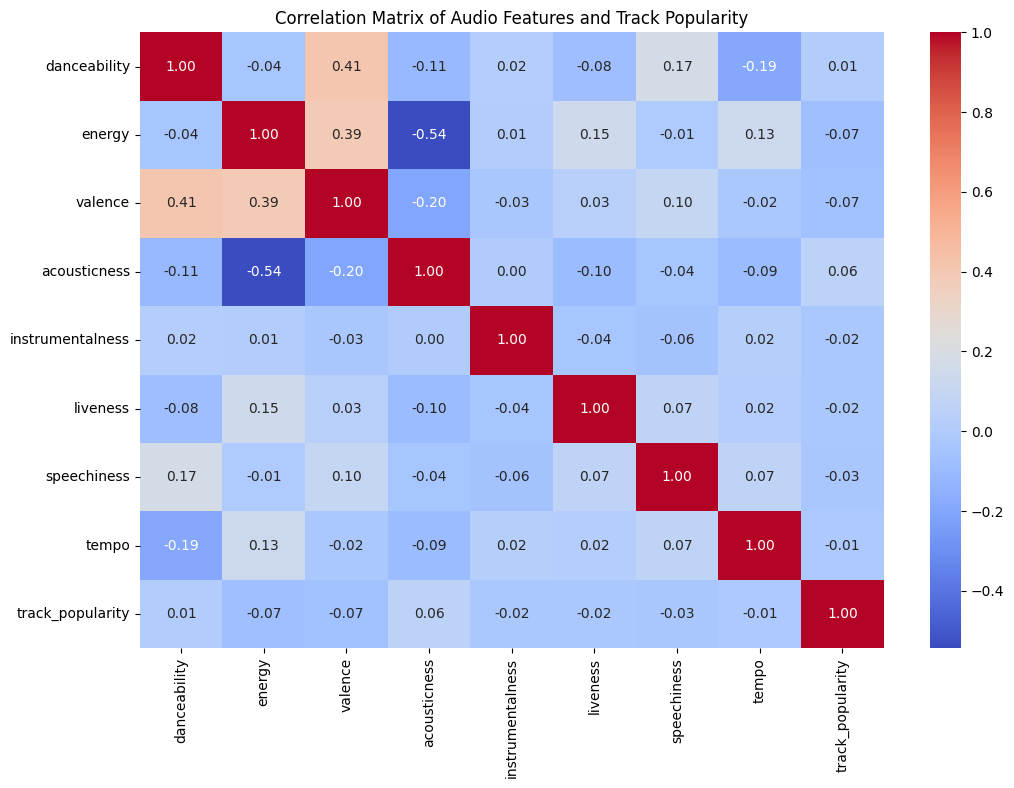

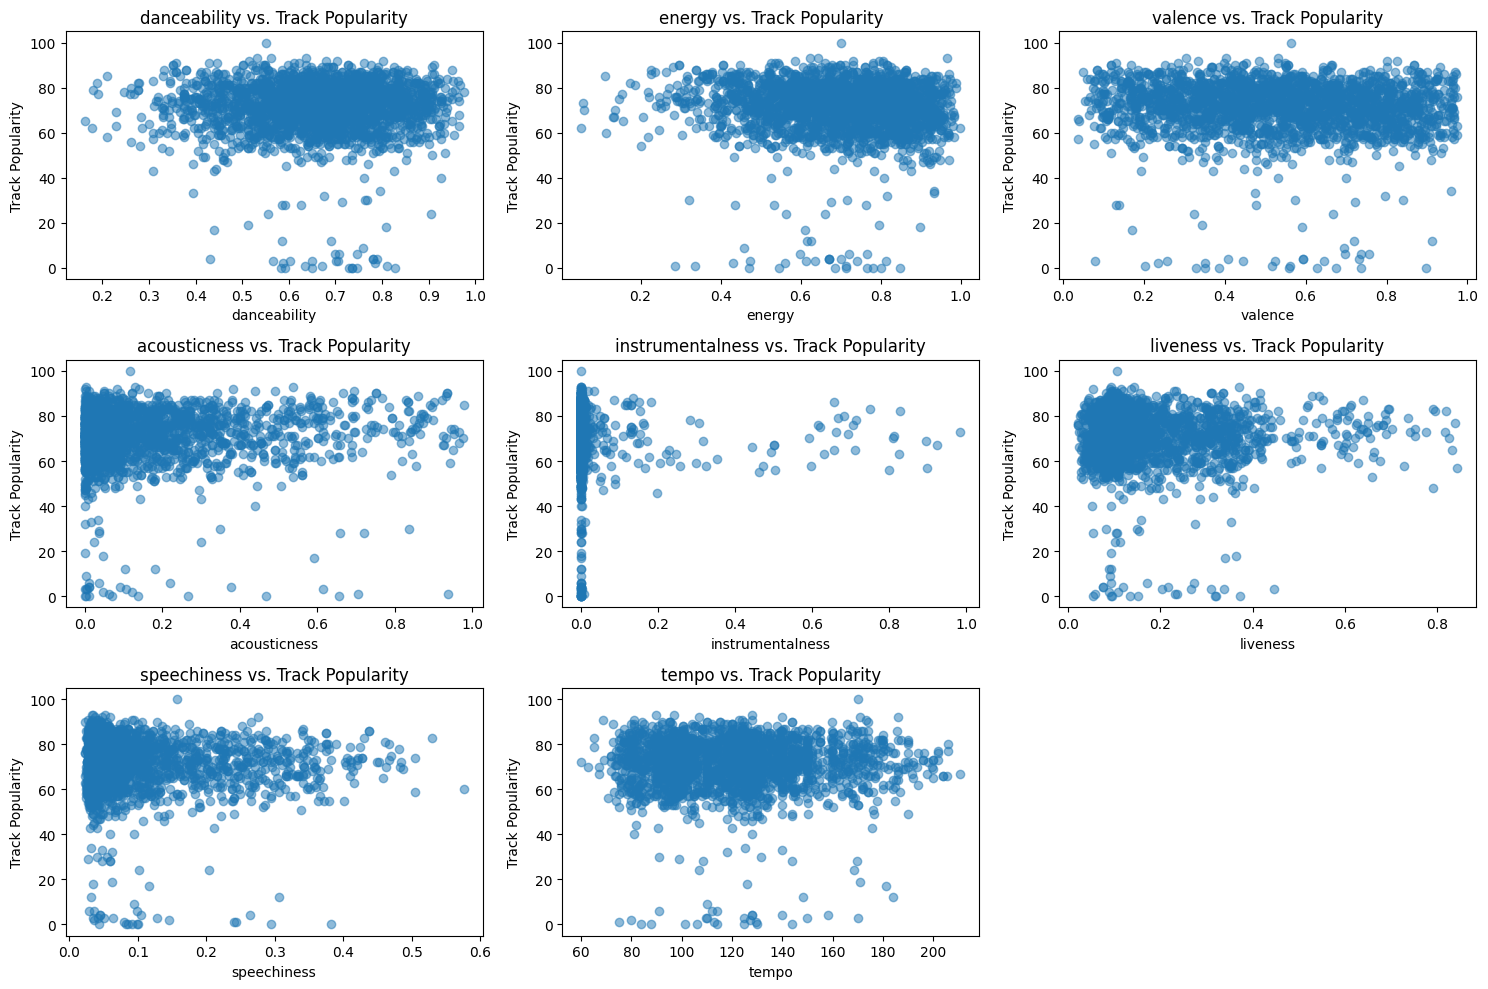

In [ ]:
# Calculate the distribution of audio features
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness', 'liveness', 'speechiness', 'tempo']
df[audio_features].describe()

# Calculate the correlation between audio features and track_popularity
correlation_matrix = df[audio_features + ['track_popularity']].corr()
display(correlation_matrix)

# Visualize the correlations using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Audio Features and Track Popularity')
plt.show()

# Explore the relationship between audio features and popularity with scatter plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(audio_features):
  plt.subplot(3, 3, i + 1)
  plt.scatter(df[feature], df['track_popularity'], alpha=0.5)
  plt.xlabel(feature)
  plt.ylabel('Track Popularity')
  plt.title(f'{feature} vs. Track Popularity')
plt.tight_layout()
plt.show()

In [ ]:
# Descomposición de series temporales para cada columna numérica individual
columnas_df=df.describe().columns.tolist()
for c in columnas_df:
  # Crear una copia del DataFrame para trabajar
  columnas_df_copy = columnas_df[c].copy()
  # Verifica si hay valores faltantes y elimínalos o interpola
  if columnas_df_copy.isnull().any():
    columnas_df_copy = columnas_df_copy.interpolate() # Rellenar NaN con interpolación
    # Eliminar filas con valores faltantes
    columnas_df_copy = columnas_df_copy.dropna()
    # Verificar que no hay valores no finitos
  if not np.isfinite(columnas_df_copy).all():
    print(f'La columna {c} contiene valores no finitos, se omite la descomposición.')
    continue
  # Descomposición de la serie temporal
  descomposicion = seasonal_decompose(columnas_df, model='additive',period=12)
  # Graficar la descomposición
  fig = descomposicion.plot()
  # Ajustar el tamaño de la figura con matplotlib
  46
  plt.gcf().set_size_inches(10, 6)
  # Ajustar el título para que no se superponga
  fig.suptitle(f'Descomposición de la serie temporal de {c}', fontsize=16,y=1.05)
  plt.show()



TypeError: list indices must be integers or slices, not str

### ING. Caracteristicas    

In [ ]:
print(df[['valence', 'energy', 'danceability']])

      valence  energy  danceability
0       0.285   0.661         0.429
1       0.684   0.897         0.434
2       0.278   0.496         0.529
3       0.400   0.864         0.556
4       0.861   0.926         0.610
...       ...     ...           ...
2295    0.362   0.736         0.775
2296    0.794   0.793         0.937
2297    0.972   0.573         0.911
2298    0.488   0.422         0.773
2299    0.203   0.657         0.376

[2300 rows x 3 columns]


Advertencia: Valores nulos encontrados en la columna 'valence'.
Advertencia: Valores nulos encontrados en la columna 'energy'.
Advertencia: Valores nulos encontrados en la columna 'danceability'.


<ipython-input-35-f13f333ff2a4>:28: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





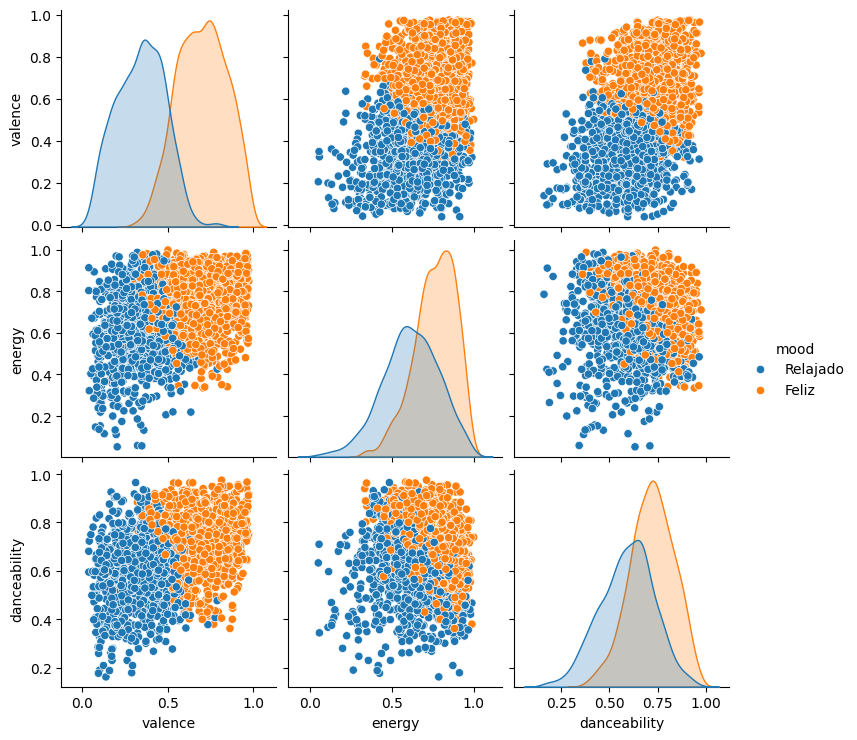

             track_name  artist_name      mood
0                Yellow     Coldplay  Relajado
1  All The Small Things    blink-182     Feliz
2               Breathe   Faith Hill  Relajado
3            In the End  Linkin Park  Relajado
4           Bye Bye Bye       *NSYNC     Feliz


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

def classify_songs_by_mood(file_path):
    """
    Clasifica canciones por estado de ánimo utilizando K-Means y características de audio.

    Args:
        file_path (str): Ruta al archivo CSV con los datos de las canciones.

    Returns:
        pandas.DataFrame: DataFrame con las canciones clasificadas por estado de ánimo.
    """
    features = ['valence', 'energy', 'danceability']
    if not all(feature in df.columns for feature in features):
        print("Error: Las columnas 'valence', 'energy' y 'danceability' son requeridas.")
        return None

    for feature in features:
        if df[feature].isnull().any():
            print(f"Advertencia: Valores nulos encontrados en la columna '{feature}'.")
            #Opcion 1: rellenar con la media
            df[feature].fillna(df[feature].mean(), inplace=True)
            #Opcion 2: rellenar con la mediana
            #df[feature].fillna(df[feature].median(), inplace=True)
            #Opcion 3: eliminar filas con nulos
            #df.dropna(subset=[feature], inplace=True)

    X = df[features]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Determinar el número óptimo de clusters usando la puntuación de silueta
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        labels = kmeans.fit_predict(X_scaled)
        silhouette_scores.append(silhouette_score(X_scaled, labels))

    optimal_clusters = np.argmax(silhouette_scores) + 2  # +2 porque empezamos en 2 clusters

    # Aplicar K-Means con el número óptimo de clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    df['mood_cluster'] = kmeans.fit_predict(X_scaled)

    # Asignar etiquetas de estado de ánimo basadas en los valores promedio de los clusters
    cluster_means = df.groupby('mood_cluster')[features].mean()

    def get_mood(cluster):
        valence, energy, danceability = cluster_means.loc[cluster]
        if valence > 0.6 and energy > 0.5 and danceability > 0.5:
            return 'Feliz'
        elif valence < 0.4 and energy < 0.4 and danceability < 0.4:
            return 'Triste'
        elif energy > 0.7 and danceability > 0.6:
            return 'Energético'
        else:
            return 'Relajado'

    df['mood'] = df['mood_cluster'].apply(get_mood)

    # Visualizar los resultados (opcional)
    visualize_mood_clusters(df, features)

    return df

def visualize_mood_clusters(df, features):
    """
    Visualiza los clusters de estado de ánimo.

    Args:
        df (pandas.DataFrame): DataFrame con los datos de las canciones.
        features (list): Lista de características utilizadas para el clustering.
    """

    sns.pairplot(df, hue='mood', vars=features)
    plt.show()

# Ejemplo de uso
file_path = df
mood_df = classify_songs_by_mood(file_path)

if mood_df is not None:
    print(mood_df[['track_name', 'artist_name', 'mood']].head())